In [1]:
import pandas as pd

df = pd.read_csv("/Users/llouis/Desktop/LLouis/AI_Everything/1. 기초 수학 및 프로그래밍/1. 수학 기초/1. 선형대수학/11. 선형대수 적용/mnist.csv")

In [2]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(10000, 785)

In [4]:
X = df.iloc[:, 1:].copy()
y = df.iloc[:, 0].copy()

In [5]:
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [7]:
X = X.to_numpy()
X = X.astype('float32') / 255

In [8]:
import numpy as np

X = np.reshape(X, (X.shape[0], 28, 28, 1))

In [9]:
28 * 28

784

In [10]:
14 * 14 * 4

784

In [11]:
X[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [12]:
X.shape

(10000, 28, 28, 1)

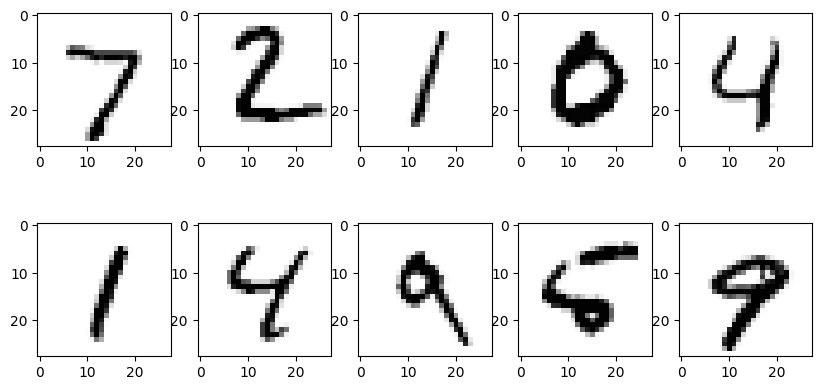

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(2 * 5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape((28, 28)),
               cmap='Greys')
plt.show()

In [14]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)

In [15]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

In [17]:
X_tn.shape

(7500, 28, 28, 1)

In [18]:
y_tn.shape

(7500, 10)

In [19]:
# 합성곱 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

n_class = len(y_tn[0])

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 input_shape=(28, 28, 1),
                 padding='valid',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding='valid',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation='softmax'))
model.summary()

/opt/anaconda3/envs/python3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       820,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 840,554 (3.21 MB)

 Trainable params: 840,554 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [86]:
hist = model.fit(X_tn, y_tn, epochs=3, batch_size=100)

Epoch 1/3
75/75 [==============================] - 3s 34ms/step - loss: 0.7568 - accuracy: 0.7535
Epoch 2/3
75/75 [==============================] - 3s 38ms/step - loss: 0.2005 - accuracy: 0.9396
Epoch 3/3
75/75 [==============================] - 3s 43ms/step - loss: 0.1359 - accuracy: 0.9565


In [87]:
print(model.evaluate(X_tn, y_tn)[1])

235/235 [==============================] - 1s 4ms/step - loss: 0.0711 - accuracy: 0.9765
0.9765333533287048


In [88]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

79/79 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9752
0.9751999974250793
